Import Libraries

In [14]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

Plan

In [ ]:
#load data
#split the data into train and test set
#build the network architecture
#compile network
#train network
#plot history of training

Main Coding

In [15]:
DATASET_PATH = '/content/drive/MyDrive/audio_data.json'

In [16]:
#load data
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  
  # convert lists into numpy arrays
  inputs = np.array(data["mfcc"])
  targets = np.array(data["labels"])

  return inputs, targets


In [27]:
def plot_history(history):
  fig,axs = plt.subplots(2)
  fig.tight_layout(h_pad=2)

  #create accuracy subplot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_title("Accuracy eval")


  #create error subplot
  axs[1].plot(history.history["loss"], label="train accuracy")
  axs[1].plot(history.history["val_accuracy"], label="test accuracy")
  axs[1].set_ylabel("Accuracy")
  axs[1].legend(loc="lower right")
  axs[1].set_title("Accuracy eval")

  plt.show()

Epoch 1/50
219/219 [==============================] - 8s 34ms/step - loss: 41.0421 - accuracy: 0.1528 - val_loss: 3.4499 - val_accuracy: 0.1641
Epoch 2/50
219/219 [==============================] - 6s 25ms/step - loss: 7.4757 - accuracy: 0.1614 - val_loss: 3.4632 - val_accuracy: 0.1380
Epoch 3/50
219/219 [==============================] - 6s 29ms/step - loss: 4.6876 - accuracy: 0.1434 - val_loss: 3.4721 - val_accuracy: 0.1370
Epoch 4/50
219/219 [==============================] - 7s 30ms/step - loss: 4.0492 - accuracy: 0.1265 - val_loss: 3.4563 - val_accuracy: 0.1424
Epoch 5/50
219/219 [==============================] - 6s 26ms/step - loss: 3.7729 - accuracy: 0.1345 - val_loss: 3.4205 - val_accuracy: 0.1584
Epoch 6/50
219/219 [==============================] - 6s 27ms/step - loss: 3.6780 - accuracy: 0.1375 - val_loss: 3.4148 - val_accuracy: 0.1587
Epoch 7/50
219/219 [==============================] - 6s 27ms/step - loss: 3.5641 - accuracy: 0.1494 - val_loss: 3.3691 - val_accuracy: 0.169

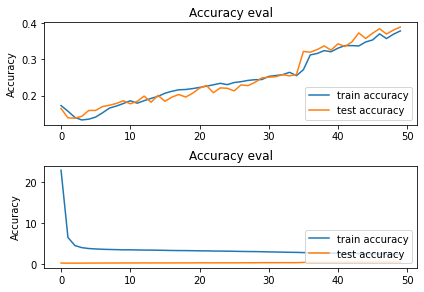

In [29]:
#get the data
inputs,targets = load_data(DATASET_PATH)

#split the data
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                           targets,
                                                                           test_size = 0.3)

#build the network architecture
model = keras.Sequential([
   #input layer
   keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),  
   
   #1st hidden layer
   keras.layers.Dense(512, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
   keras.layers.Dropout(0.3),
   
   #2nd hidden layer
   keras.layers.Dense(256, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
   keras.layers.Dropout(0.3),

   #3rd hidden layer
   keras.layers.Dense(63, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
   keras.layers.Dropout(0.3),
   
   #output layer
   keras.layers.Dense(10, activation="softmax")

])


#compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

#train network
history = model.fit(inputs_train,targets_train, 
          validation_data=(inputs_test,targets_test),
          epochs=50,
          batch_size=32)

#plot accuracy and error over the epochs
plot_history(history)

In [30]:
model.evaluate(inputs_test,targets_test, verbose=1)

94/94 [==============================] - 1s 11ms/step - loss: 2.3414 - accuracy: 0.3898


[2.3414273262023926, 0.38979658484458923]